In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import statsmodels.api as sm

# Measurements

## Documenting supply chain events
- Performance time of documenting supply chain events: producing, shipping, receiving
- Performance time of documenting supply chein event manufacturing depending on the number of compartments used for manufacturing

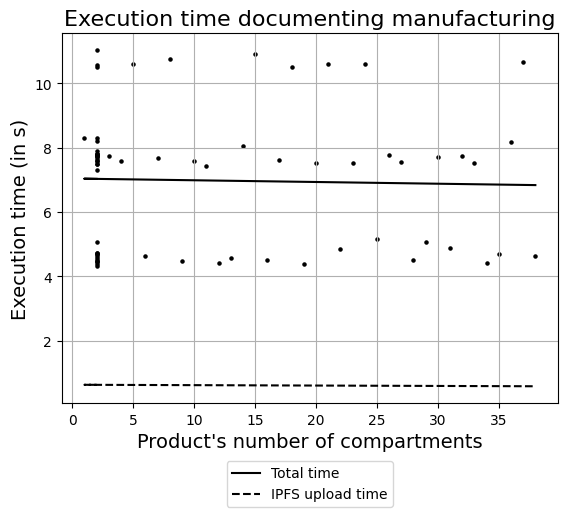

In [34]:
# import measurements
manufacturingTimeMeasurements = pd.read_csv("./tests-and-results/measurements/manufacturingTimeMeasurements.csv", names=["timestamp", "implementation", "event", "didId", "numberOfCompartments", "execTime", "uploadTimeIpfs"])

# Performance time of documenting supply chein event manufacturing depending on the number of compartments used for manufacturing
plt.scatter(
    manufacturingTimeMeasurements["numberOfCompartments"], 
    manufacturingTimeMeasurements["execTime"] / 1000,
    #facecolors='none', 
    #edgecolors='black',
    s=5,
    c="#000000",
    #alpha=0.6
)

# add linear regression line
m, b = np.polyfit(
    manufacturingTimeMeasurements["numberOfCompartments"], 
    manufacturingTimeMeasurements["execTime"] / 1000, 
    1
)
plt.plot(
    manufacturingTimeMeasurements["numberOfCompartments"],
    m * manufacturingTimeMeasurements["numberOfCompartments"] + b,
    color="black",
    label="Total time"
)

# add regression line for upload time to IPFS
m1, b1 = np.polyfit(
    manufacturingTimeMeasurements["numberOfCompartments"], 
    manufacturingTimeMeasurements["uploadTimeIpfs"] / 1000, 
    1
)
plt.plot(
    manufacturingTimeMeasurements["numberOfCompartments"],
    m1 * manufacturingTimeMeasurements["numberOfCompartments"] + b1,
    color="black",
    linestyle="dashed",
    label="IPFS upload time"
)

#plt.suptitle("Execution time documenting manufacturing",fontsize=16, y=1)
#plt.title("Depending on manufactured product's number of compartments",fontsize=10)
plt.title("Execution time documenting manufacturing",fontsize=16)
plt.xlabel("Product's number of compartments", fontsize=14)
plt.ylabel("Execution time (in s)", fontsize=14)
plt.grid()
plt.legend(bbox_to_anchor =(0.5,-0.3), loc='lower center')
plt.savefig("./plots/execTimeDocumentingManufacturingDependingOnNumberCompartments.png", dpi=400, bbox_inches='tight')
plt.show()

In [35]:
manufacturingTimeMeasurements.describe()

,numberOfCompartments,execTime,uploadTimeIpfs
count,68.000000,68.000000,68.000000
mean,11.779412,6974.426471,613.147059
std,12.034584,2122.502531,159.959161
min,1.000000,4325.000000,444.000000
25%,2.000000,4678.000000,501.500000
50%,4.500000,7556.500000,556.500000
75%,21.250000,7807.500000,644.500000
max,38.000000,11025.000000,1178.000000


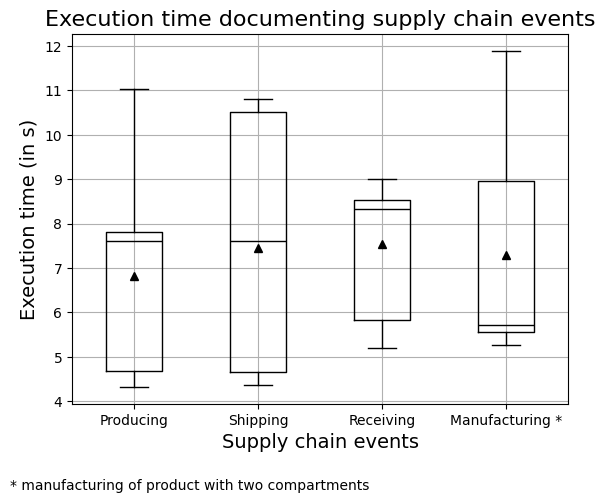

In [36]:
# Performance time of documenting supply chain events: producing, shipping, receiving, manufacturing
documentationTimeMeasurements = pd.read_csv("./tests-and-results/measurements/eventDocumentingTimeMeasurements.csv", names=["timestamp", "implementation", "event", "didId", "execTime", "uploadTimeIpfs"])
selectedDate = "Mar 06 2024"

# get measurements of selected date for documenting supply producing, shipping, receiving,
selectedDocumentationTimeMeasurements = documentationTimeMeasurements[[True if selectedDate in timestamp else False for timestamp in documentationTimeMeasurements["timestamp"]]]

# get measurements of selected date for documenting manufacturing
selectedManufacturingTimeMeasurements = manufacturingTimeMeasurements[manufacturingTimeMeasurements["numberOfCompartments"] == 2][["timestamp", "implementation", "event", "didId", "execTime", "uploadTimeIpfs"]]
selectedManufacturingTimeMeasurements = selectedManufacturingTimeMeasurements[[True if selectedDate in timestamp else False for timestamp in selectedManufacturingTimeMeasurements["timestamp"]]]

# merge measurement data of all four supply chain events
selectedDocumentationTimeMeasurements = pd.concat([selectedDocumentationTimeMeasurements, selectedManufacturingTimeMeasurements])

# transform data for plot
pivotedDocumentationTimeMeasurements = selectedDocumentationTimeMeasurements.pivot(columns='event', values='execTime').astype(float)/1000

# rename columns 
pivotedDocumentationTimeMeasurements.columns = ["Producing", "Shipping", "Receiving", "Manufacturing *"]

# boxplot for each supply chain event's documentation time
ax = pivotedDocumentationTimeMeasurements[pivotedDocumentationTimeMeasurements.columns].plot(
    kind='box', 
    title='Exectuion time documenting supply chain events',
    color="black",
    showmeans=True,
    meanprops={'markerfacecolor': "black", 'markeredgecolor': "black"}
)

# display the plot
plt.title("Execution time documenting supply chain events", fontsize=16)
plt.xlabel("Supply chain events", fontsize=14)
plt.ylabel("Execution time (in s)", fontsize=14)
plt.grid()
plt.text(0, 2, "* manufacturing of product with two compartments")
plt.savefig("./plots/execTimeDocumenting.png", dpi=400, bbox_inches='tight')
plt.show()


In [37]:
manufacturingTimeMeasurements

,timestamp,implementation,event,didId,numberOfCompartments,execTime,uploadTimeIpfs
0,Wed Mar 06 2024 13:12:41 GMT+0100 (Mitteleurop...,didCheqdCredentialServiceAPI,manufacturing,did:cheqd:testnet:3945f3a8-04fa-4625-9e06-079f...,2,5056,815
1,Wed Mar 06 2024 13:12:54 GMT+0100 (Mitteleurop...,didCheqdCredentialServiceAPI,manufacturing,did:cheqd:testnet:628caad9-c380-4175-ba6f-ea26...,2,7598,512
2,Wed Mar 06 2024 13:13:04 GMT+0100 (Mitteleurop...,didCheqdCredentialServiceAPI,manufacturing,did:cheqd:testnet:36d0a9b2-b2ec-431c-80b6-c5de...,2,7723,610
3,Wed Mar 06 2024 13:13:11 GMT+0100 (Mitteleurop...,didCheqdCredentialServiceAPI,manufacturing,did:cheqd:testnet:ab3437cc-05bf-487c-b7b6-05e6...,2,4657,583
4,Wed Mar 06 2024 13:13:24 GMT+0100 (Mitteleurop...,didCheqdCredentialServiceAPI,manufacturing,did:cheqd:testnet:7de9a86f-8f83-4a74-b0ae-4bba...,2,7703,577
...,...,...,...,...,...,...,...
63,Wed Mar 06 2024 13:33:04 GMT+0100 (Mitteleurop...,didCheqdCredentialServiceAPI,manufacturing,did:cheqd:testnet:885d26c9-089a-4f98-a5f0-0f20...,34,4426,474
64,Wed Mar 06 2024 13:33:14 GMT+0100 (Mitteleurop...,didCheqdCredentialServiceAPI,manufacturing,did:cheqd:testnet:0fd9ee6e-e7fd-40af-bcc6-5ec2...,35,4685,542
65,Wed Mar 06 2024 13:33:27 GMT+0100 (Mitteleurop...,didCheqdCredentialServiceAPI,manufacturing,did:cheqd:testnet:dade1ada-e8ae-4e36-9691-ee0d...,36,8164,980
66,Wed Mar 06 2024 13:33:40 GMT+0100 (Mitteleurop...,didCheqdCredentialServiceAPI,manufacturing,did:cheqd:testnet:61f8b80d-044b-4050-9e30-3f98...,37,10656,527


In [38]:
documentationTimeMeasurements.describe()

,timestamp,implementation,event,didId,execTime,uploadTimeIpfs
count,502,502,502,502,502,502
unique,502,1,3,80,269,219
top,Fri Mar 01 2024 13:03:34 GMT+0100 (Mitteleurop...,didCheqdCredentialServiceAPI,shipping,did:cheqd:testnet:64729fd5-f919-4d52-b70b-c47d...,NAN,NAN
freq,1,502,216,70,226,226


In [39]:
pivotedDocumentationTimeMeasurements.describe()

,Producing,Shipping,Receiving,Manufacturing *
count,31.000000,30.000000,30.000000,30.000000
mean,6.808903,7.455500,7.546200,7.280133
std,1.999246,2.533551,1.415017,2.519139
min,4.325000,4.360000,5.203000,5.270000
25%,4.675500,4.667750,5.831750,5.557500
50%,7.598000,7.615000,8.331000,5.721000
75%,7.801000,10.515000,8.538000,8.951500
max,11.025000,10.810000,9.004000,11.890000


## Tracing products
- Performance time of tracing products depending on their number of supply chain events
- (Performance time of tracing products depending on their number of used compartments)

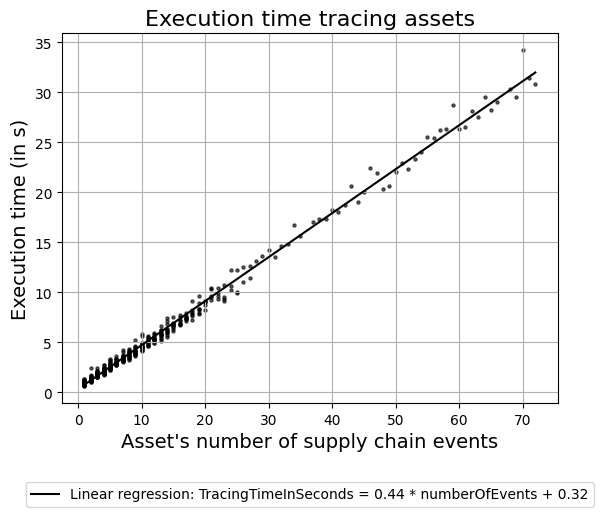

In [40]:
# Performance time of tracing products depending on their number of supply chain events
# import measurements
tracingMeasurements = pd.read_csv("./tests-and-results/measurements/tracingMeasurements.csv", names=["timestamp", "implementation", "event", "didId", "numberOfEvents","numberOfCompartments", "execTime"])

# Performance time of documenting supply chein event manufacturing depending on the number of compartments used for manufacturing
plt.scatter(
    tracingMeasurements["numberOfEvents"], 
    tracingMeasurements["execTime"] / 1000,
    #facecolors='none', 
    #edgecolors='black',
    s=5,
    c="#000000",
    alpha=0.6
)

# add linear regression line
m, b = np.polyfit(
    tracingMeasurements["numberOfEvents"], 
    tracingMeasurements["execTime"] / 1000, 
    1
)
plt.plot(
    tracingMeasurements["numberOfEvents"],
    m * tracingMeasurements["numberOfEvents"] + b,
    color="black",
    label="Linear regression: TracingTimeInSeconds = "+str(round(m, 2))+" * numberOfEvents + "+str(round(b, 2))
)

plt.title("Execution time tracing assets", fontsize=16) #depending on their supply chain history
plt.xlabel("Asset's number of supply chain events", fontsize=14)
plt.ylabel("Execution time (in s)", fontsize=14)
plt.grid()
plt.legend(bbox_to_anchor =(0.5,-0.3), loc='lower center')
plt.savefig("./plots/execTimeTracingDependingOnNumberDidDocVersions.png", dpi=400, bbox_inches='tight')
plt.show()

In [41]:
# Linear regression for tracing time of material depending on its number of documented supply chain events

#define response variable
y = tracingMeasurements["execTime"] /1000

#define predictor variables
x = tracingMeasurements["numberOfEvents"]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               execTime   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.696e+04
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:41:41   Log-Likelihood:                -275.50
No. Observations:                 383   AIC:                             555.0
Df Residuals:                     381   BIC:                             562.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3187      0.034      9.

In [42]:
# Summary dataset
tracingMeasurements.describe()

,numberOfEvents,numberOfCompartments,execTime
count,383.000000,383.0,383.000000
mean,13.477807,0.0,6248.253264
std,14.988963,0.0,6613.157184
min,1.000000,0.0,600.000000
25%,4.000000,0.0,2177.000000
50%,9.000000,0.0,4053.000000
75%,16.000000,0.0,7275.000000
max,72.000000,0.0,34215.000000
